In [47]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
def clean_df(df):
    """cleans data in dataframe df"""
    
    #change numbering format to english standard
    df['Amount'] =  [x.strip().replace('.', '') for x in df['Amount']]
    df['Amount'] =  [x.strip().replace(',', '.') for x in df['Amount']]

    #change from string to datetime
    df['Date'] = pd.to_datetime(df['Date'],format='%d.%m.%Y')
    #change from string to number in 5th column
    df[['Amount']] = df[['Amount']].apply(pd.to_numeric)
    #strip whitespace in 2nd column
    df['Party'] = df['Party'].str.strip()
    
    return df

In [3]:
def slice_by_date(df, start_date, end_date):
    """returns a dataframe subset in the range specified"""
    
    #convert strings to datetime format
    start_date = pd.to_datetime(start_date, format='%d.%m.%Y')
    end_date = pd.to_datetime(end_date, format='%d.%m.%Y')
    
    #slice dataframe to given date range
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    
    #return sliced dataframe
    return df.loc[mask]    

In [4]:
def split_df(df):
    """splits dataframe into income and outgo dataframes""" 
    
    #income values are positive
    income_df = df[df['Amount'] > 0]

    #outgo values are negative
    outgo_df = df[df['Amount'] < 0]
    
    return income_df, outgo_df

In [5]:
def group_df(df):
    """sums duplicate entries then drops the duplicates"""
    
    #Values summed in column '5' for duplicates in column 'Party'
    df['Amount'] = df.groupby(['Party'])['Amount'].transform('sum')
    
    #duplicates in column 'Party' are dropped
    df = df.drop_duplicates(subset='Party')
    #df = df.drop(['Party'], axis=1)
    
    return df

In [6]:
def categorize_outgo(df):
    
    df['Category'] = 'OTHER'
    
     #lists of known senders
    groceries = ['NETTO MARKEN-DISCOU.','DM DROGERIEMARKT SAGT DANKE',
                 'Feldkamp Einzelhan', 'ALDI SUED SAGT DANKE', 
                 'DANKE, IHR LIDL','PRO BIOMARKT','Feldkamp Einzelhandels oH',
                 'JACQUES WEIN-DEPOT','ROSSMANN VIELEN DANK','3825 NK DU-NEUDORF']
    
    rent = ['Duisburger Haus- und Grundbesitzer GmbH']
    
    utilities = ['Stadtwerke Duisburg AG', 'UNITYMEDIA NRW GMBH',
                 'Telefonica Germany GmbH + Co. OHG', 'VISA MULLVAD',
                 'Rundfunk ARD, ZDF, DRadio']
    
    insurance = ['HUK-COBURG UNTERNEHMENSGRUPPE', 'Wurzburger Versicherungs-AG']
    
    savings = ['Lena Tillman']
    
    delivery = ['VISA LIEFERSERVICE.DE','VISA LIEFERANDO.DE']
    
    online = ['VISA AMAZON SVCS EU-DE AMAZ', 'VISA AMAZON DE MARKETPLACE',
              'VISA AMAZON EU','VISA AMAZON EU AMAZON.DE']
    
    baby_class = ['Evangelischer Kirchenkreis Duisburg']
    
    fees = ['ING-DiBa AG, Frankfurt a.M.']
    
    cash = ['VISA SPARKASSE DUISBURG']
    
    uni = ['Hochschule Rhein-Waa']
    
    car = ['OIL TANKSTELLEN GMBH COKG']
    
    holiday = ['VISA PARKING NOU MERCAT','VISA AUCAT BAR VALLCARC',
               'VISA HERTZ DE ESPANA SA', 'VISA E0565 EL PRAT DE LLOBR',
               'VISA BANCOSABADELL/10081174','First Data Deutschland GmbH',
               'VISA CHIR.IBIZA PLAYA CASTE', 'VISA ATM 0388 BANCA MARCH1',
               'VISA LUCIANA PAVONE', 'VISA 1616000011/EL PRAT',
               '3140 GOODMAN + FILIPPO DUeS','VISA CAR DEL MAR']
    
    clothes = ['RUNNERS POINT FORUM DUISBUR', 'KARSTADT WARENHAUS GMBH']
    
    health = ['LOEWEN-APOTHEKE','DRES. JUTTA VAN BOEMMEL, DU','MVZ DIE ZAHNAERZTE MUELHEIM']
    
    home = ['VISA BM DUISBURG/KASSLE']
    
    leisure = ['VISA STEAMGAMES.COM 4259522', 'VISA STEAMGAMES.COM']
    
    df.loc[df['Party'].isin(groceries), 'Category'] = 'GROCERIES'
    df.loc[df['Party'].isin(rent), 'Category'] = 'RENT'
    df.loc[df['Party'].isin(utilities), 'Category'] = 'UTILITIES'
    df.loc[df['Party'].isin(insurance), 'Category'] = 'INSURANCE'
    df.loc[df['Party'].isin(savings), 'Category'] = 'SAVINGS'
    df.loc[df['Party'].isin(delivery), 'Category'] = 'DELIVERY'
    df.loc[df['Party'].isin(online), 'Category'] = 'ONLINE'
    df.loc[df['Party'].isin(baby_class), 'Category'] = 'BABY CLASSES'
    df.loc[df['Party'].isin(fees), 'Category'] = 'FEES'
    df.loc[df['Party'].isin(cash), 'Category'] = 'CASH'
    df.loc[df['Party'].isin(uni), 'Category'] = 'UNI'
    df.loc[df['Party'].isin(car), 'Category'] = 'CAR'
    df.loc[df['Party'].isin(holiday), 'Category'] = 'HOLIDAY'
    df.loc[df['Party'].isin(clothes), 'Category'] = 'CLOTHES'
    df.loc[df['Party'].isin(health), 'Category'] = 'HEALTH'
    df.loc[df['Party'].isin(home), 'Category'] = 'HOME'
    df.loc[df['Party'].isin(leisure), 'Category'] = 'LEISURE'
    
    return df
    

In [7]:
def cat_income(df, other=False):
    """categorizes income"""
    
    #lists of known senders
    paycheck = ['Landeskasse Duesseldorf fuer LBV']
    
    tax_return = ['STEUERVERWALTUNG NRW']
    
    transfers = ['ING-DiBa AG, Frankfurt a.M.']
    
    eltgeld = ['Bundeskasse Trier']
    
    #list of categories
    categories = ['PAYCHECK', 'ELTERNGELD', 'TAX RETURN', 'TRANSFERS' ]

    #change values in column '2' if they are on a list
    df.loc[df['Party'].isin(paycheck), 'Party'] = 'PAYCHECK'
    df.loc[df['Party'].isin(tax_return), 'Party'] = 'TAX RETURN'
    df.loc[df['Party'].isin(transfers), 'Party'] = 'TRANSFERS'
    df.loc[df['Party'].isin(eltgeld), 'Party'] = 'ELTERNGELD'
    
    #if others=True, values not in categories list are renamed to 'OTHERS'
    if other:
        df.loc[~df['Party'].isin(categories), 'Party'] = 'OTHER'
    
    return df

In [20]:
def cat_outgo(df, other=False):
    """sums duplicate entries then drops the duplicates"""
    
    #lists of known senders
    groceries = ['NETTO MARKEN-DISCOU.','DM DROGERIEMARKT SAGT DANKE',
                 'Feldkamp Einzelhan', 'ALDI SUED SAGT DANKE', 
                 'DANKE, IHR LIDL','PRO BIOMARKT','Feldkamp Einzelhandels oH',
                 'JACQUES WEIN-DEPOT','ROSSMANN VIELEN DANK','3825 NK DU-NEUDORF',
                 'Feldkamp Einzelhandels EH', 'KAISERS TENGELMANN GMBH']
    
    rent = ['Duisburger Haus- und Grundbesitzer GmbH']
    
    utilities = ['Stadtwerke Duisburg AG', 'UNITYMEDIA NRW GMBH',
                 'Telefonica Germany GmbH + Co. OHG', 'VISA MULLVAD',
                 'Rundfunk ARD, ZDF, DRadio']
    
    insurance = ['HUK-COBURG UNTERNEHMENSGRUPPE', 'Wurzburger Versicherungs-AG']
    
    savings = ['Lena Tillman']
    
    delivery = ['VISA LIEFERSERVICE.DE','VISA LIEFERANDO.DE']
    
    online = ['VISA AMAZON SVCS EU-DE AMAZ', 'VISA AMAZON DE MARKETPLACE',
              'VISA AMAZON EU','VISA AMAZON EU AMAZON.DE']
    
    baby_class = ['Evangelischer Kirchenkreis Duisburg']
    
    fees = ['ING-DiBa AG, Frankfurt a.M.']
    
    cash = ['VISA SPARKASSE DUISBURG']
    
    uni = ['Hochschule Rhein-Waa']
    
    car = ['OIL TANKSTELLEN GMBH COKG']
    
    holiday = ['VISA PARKING NOU MERCAT','VISA AUCAT BAR VALLCARC',
               'VISA HERTZ DE ESPANA SA', 'VISA E0565 EL PRAT DE LLOBR',
               'VISA BANCOSABADELL/10081174','First Data Deutschland GmbH',
               'VISA CHIR.IBIZA PLAYA CASTE', 'VISA ATM 0388 BANCA MARCH1',
               'VISA LUCIANA PAVONE', 'VISA 1616000011/EL PRAT',
               '3140 GOODMAN + FILIPPO DUeS','VISA CAR DEL MAR']
    
    clothes = ['RUNNERS POINT FORUM DUISBUR', 'KARSTADT WARENHAUS GMBH']
    
    health = ['LOEWEN-APOTHEKE','DRES. JUTTA VAN BOEMMEL, DU','MVZ DIE ZAHNAERZTE MUELHEIM']
    
    home = ['VISA BM DUISBURG/KASSLE']
    
    leisure = ['VISA STEAMGAMES.COM 4259522', 'VISA STEAMGAMES.COM']
    
    #list of categories
    categories = ['GROCERIES', 'RENT', 'UTILITIES', 'INSURANCE'
                  'SAVINGS', 'DELIVERY', 'ONLINE', 'BABY CLASSES',
                  'FEES', 'CASH', 'UNI', 'CAR', 'HOLIDAY','CLOTHES',
                  'HEALTH','HOME', 'LEISURE']
    
    #change values in column 'Party' if they are on a list
    df.loc[df['Party'].isin(groceries), 'Party'] = 'GROCERIES'
    df.loc[df['Party'].isin(rent), 'Party'] = 'RENT'
    df.loc[df['Party'].isin(utilities), 'Party'] = 'UTILITIES'
    df.loc[df['Party'].isin(insurance), 'Party'] = 'INSURANCE'
    df.loc[df['Party'].isin(savings), 'Party'] = 'SAVINGS'
    df.loc[df['Party'].isin(delivery), 'Party'] = 'DELIVERY'
    df.loc[df['Party'].isin(online), 'Party'] = 'ONLINE'
    df.loc[df['Party'].isin(baby_class), 'Party'] = 'BABY CLASSES'
    df.loc[df['Party'].isin(fees), 'Party'] = 'FEES'
    df.loc[df['Party'].isin(cash), 'Party'] = 'CASH'
    df.loc[df['Party'].isin(uni), 'Party'] = 'UNI'
    df.loc[df['Party'].isin(car), 'Party'] = 'CAR'
    df.loc[df['Party'].isin(holiday), 'Party'] = 'HOLIDAY'
    df.loc[df['Party'].isin(clothes), 'Party'] = 'CLOTHES'
    df.loc[df['Party'].isin(health), 'Party'] = 'HEALTH'
    df.loc[df['Party'].isin(home), 'Party'] = 'HOME'
    df.loc[df['Party'].isin(leisure), 'Party'] = 'LEISURE'
    #if others = True, values not in categories list are renamed to 'OTHERS'
    if other:
        df.loc[~df['Party'].isin(categories), 'Party'] = 'OTHER'
    
    return df

In [9]:
def show_both(csv, start_date, end_date):
    
    #read csv data into dataframe
    df = pd.read_csv(csv,sep=';',usecols=['Date','Party','Amount'])
    
    #cleans data
    df = clean_df(df)
    
     #slice by date
    df = slice_by_date(df, start_date, end_date)
    
    #splits data into income and outgo
    income_df, outgo_df = split_df(df)
    
    return income_df, outgo_df

In [10]:
def show_df(df):
    
    #cleans data
    df = clean_df(df)
    
    #splits data into income and outgo
    income_df, outgo_df = split_df(df)
    
    return income_df, outgo_df

In [11]:
def group_both(csv, start_date, end_date, other=False):
    
    #returns cleaned df 
    income_df, outgo_df = show_both(csv, start_date, end_date)
    
    #returns categorized df
    income_df = cat_income(income_df, other)
    
    #returns df with categories summed
    income_df = group_df(income_df)
    
    #returns categorized df
    outgo_df = cat_outgo(outgo_df, other)
    
    #returns df with categories summed
    outgo_df = group_df(outgo_df)
    
    return income_df, outgo_df

In [12]:
def group_both_df(df, other=False):
    
    #returns cleaned df 
    income_df, outgo_df = split_df(df)
    
    #returns categorized df
    income_df = cat_income(income_df, other)
    
    #returns df with categories summed
    income_df = group_df(income_df)
    
    #returns categorized df
    outgo_df = cat_outgo(outgo_df, other)
    
    #returns df with categories summed
    outgo_df = group_df(outgo_df)
    
    return income_df, outgo_df

In [70]:
def trend_line(csv, category):
    
    df = pd.read_csv(csv,sep=';',usecols=['Date','Party','Amount'])
    df = clean_df(df)
    df = df.set_index('Date')
    
    months = [g for n, g in df.groupby(pd.Grouper(freq='M'))]
    
    months_income = []
    months_outgo = []

    for month in months:
        income, outgo = group_both_df(month)
        months_income.append(income)
        months_outgo.append(outgo)
        
    x = []
    y = []
    
    for month in months_outgo:
        df = month
        x.append(df.index[0].strftime('%b %Y'))
        if category in df.values:
            y.append(abs(df.loc[df['Party'] == category, 'Amount'].iloc[0]))
        else:
            y.append(0)
    
    plt.plot(x,y)
    plt.xticks(rotation=90)
    plt.show()

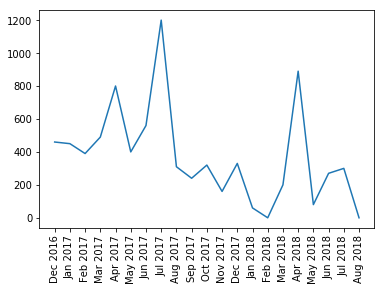

In [72]:
trend_line('banking.csv', 'CASH')

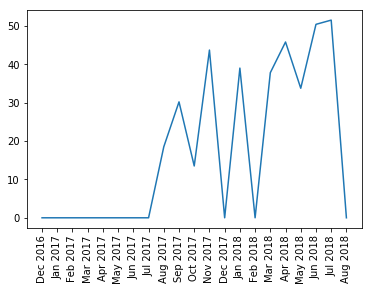

In [69]:
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

In [14]:
df = pd.read_csv('banking.csv',sep=';',usecols=['Date','Party','Amount'])
df = clean_df(df)
df = df.set_index('Date')
df.head()

,Party,Amount
Date,,
2018-08-03,Telefonica Germany GmbH + Co. OHG,-20.17
2018-08-03,Feldkamp Einzelhan,-15.01
2018-08-02,ALDI SUED SAGT DANKE,-26.60
2018-08-01,DM DROGERIEMARKT SAGT DANKE,-40.70
2018-08-01,Duisburger Haus- und Grundbesitzer GmbH,-583.00


In [15]:
months = [g for n, g in df.groupby(pd.Grouper(freq='M'))]

In [55]:
months[7]

,Party,Amount
Date,,
2017-07-03,Duisburger Haus- und Grundbesitzer GmbH,-583.00
2017-07-03,Lena Tillman,-500.00
2017-07-03,Stadtwerke Duisburg AG,-93.00
2017-07-04,VISA SPARKASSE DUISBURG,-200.00
2017-07-04,Telefonica Germany GmbH + Co. OHG,-24.85
2017-07-06,Farsbotter EH-oHG,-13.09
2017-07-07,Techniker Krankenkasse,546.00
2017-07-10,VISA SPARKASSE DUISBURG,-200.00
2017-07-12,VISA STAR TANKSTELLE,-14.60


In [21]:
months_income = []
months_outgo = []

for month in months:
    income, outgo = group_both_df(month)
    months_income.append(income)
    months_outgo.append(outgo)

In [63]:
months_outgo[10]


,Party,Amount
Date,,
2017-10-02,GROCERIES,-204.21
2017-10-02,RENT,-583.00
2017-10-02,SAVINGS,-500.00
2017-10-02,UTILITIES,-194.46
2017-10-04,ONLINE,-193.11
2017-10-05,CASH,-320.00
2017-10-06,VISA STAR TANKSTELLE,-59.79
2017-10-13,VISA AMAZON DE RETAIL AMAZO,-58.47
2017-10-16,Telefonica Germany GmbH,-30.46


In [29]:
df = months_outgo[5]
df.loc[df['Party'] == 'GROCERIES', 'Amount'].iloc[0]

-498.6699999999999

In [41]:
df.index[0].strftime('%b %Y')

'May 2017'